In [2]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.1 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime, timedelta

fake = Faker()
start_date = datetime(2024, 5, 1)
num_days = 15
num_users = 3000
transactions_per_user = 5  # 사기 사용자의 최대 거래 횟수

# 사용자 정보 초기화
users = pd.DataFrame({
    'user_id': range(num_users),
    'ip': [fake.ipv4() for _ in range(num_users)],
    'device_id': [fake.uuid4() for _ in range(num_users)],
    'phone_number': [fake.phone_number() for _ in range(num_users)],
    'credit_card': [fake.credit_card_number() for _ in range(num_users)],
})

# 사기 그룹 설정
fraud_group_size = 30
ip_fraud_users = set(np.random.choice(num_users, fraud_group_size, replace=False))
card_fraud_users = set(np.random.choice(num_users, fraud_group_size, replace=False))
device_phone_fraud_users = set(np.random.choice(num_users, fraud_group_size, replace=False))

# 사기 거래에서 공유로 사용할 속성들 정의
shared_ips = [fake.ipv4() for _ in range(10)]
shared_cards = [fake.credit_card_number() for _ in range(10)]
shared_devices = [fake.uuid4() for _ in range(10)]
shared_phones = [fake.phone_number() for _ in range(10)]

# 거래 데이터 생성
transactions = []
for user_id in range(num_users):
    num_transactions = np.random.randint(1, transactions_per_user + 1) if user_id in ip_fraud_users or user_id in card_fraud_users or user_id in device_phone_fraud_users else 5
    for _ in range(num_transactions):
        day = np.random.choice(num_days)
        date = start_date + timedelta(days=day)
        ip = shared_ips[np.random.randint(len(shared_ips))] if user_id in ip_fraud_users else users.at[user_id, 'ip']
        card = shared_cards[np.random.randint(len(shared_cards))] if user_id in card_fraud_users else users.at[user_id, 'credit_card']
        device = shared_devices[np.random.randint(len(shared_devices))] if user_id in device_phone_fraud_users else users.at[user_id, 'device_id']
        phone = shared_phones[np.random.randint(len(shared_phones))] if user_id in device_phone_fraud_users else users.at[user_id, 'phone_number']
        is_fraud = user_id in ip_fraud_users or user_id in card_fraud_users or user_id in device_phone_fraud_users
        transactions.append({
            'transaction_id': fake.uuid4(),
            'user_id': user_id,
            'transaction_time': date,
            'ip': ip,
            'device_id': device,
            'phone_number': phone,
            'credit_card_number': card,
            'order_item': np.random.choice(['스마트폰', '노트북', '식품', '문구', '악세서리','가전제품', '의류', '화장품', '아동용품', '여행용품']),
            'amount': np.random.randint(1000, 300000),
            'is_fraud': is_fraud
        })

transactions_df = pd.DataFrame(transactions)

# 코드 간단 설명

- **사용자 정보 생성:**  
  - 3000명의 사용자를 생성하고, 각 사용자에 대해 IP, 디바이스 ID, 전화번호, 신용카드 번호를 무작위로 생성합니다.

- **사기 그룹 설정:**  
  - 사기 거래를 모의하기 위해, 30명의 사용자를 무작위로 선택하여 IP, 카드, 디바이스/전화번호 관련 사기 그룹으로 지정합니다.

- **공유 속성 생성:**  
  - 사기 거래에서 사용할 공유 IP, 신용카드 번호, 디바이스 ID, 전화번호를 각각 10개씩 생성합니다.

- **거래 데이터 생성:**  
  - 각 사용자별로 거래 데이터를 생성합니다.
  - 사기 사용자일 경우 1~5회, 정상 사용자는 5회 거래 데이터를 만듭니다.
  - 각 거래에는 거래 시간, 거래 ID, 주문 아이템, 금액, 사기 여부 등의 정보가 포함됩니다.

- **데이터프레임 생성:**  
  - 생성된 거래 데이터를 pandas DataFrame인 `transactions_df`에 저장합니다.

In [6]:
transactions_df

,transaction_id,user_id,transaction_time,ip,device_id,phone_number,credit_card_number,order_item,amount,is_fraud
0,e3156e67-eddf-48c2-9d75-017f7837838a,0,2024-05-04,179.13.113.254,bbf1aa5b-9599-4971-ba45-d7749b421ddc,(619)373-1598x393,6011407302062709,스마트폰,49378,False
1,ec58da8c-d520-42d5-a445-e3ecac3bd071,0,2024-05-10,179.13.113.254,bbf1aa5b-9599-4971-ba45-d7749b421ddc,(619)373-1598x393,6011407302062709,악세서리,147471,False
2,bc32b3ec-0b63-452b-b019-48eb60caaef3,0,2024-05-12,179.13.113.254,bbf1aa5b-9599-4971-ba45-d7749b421ddc,(619)373-1598x393,6011407302062709,아동용품,198926,False
3,a7a707e2-d283-407b-97a4-8a080285570d,0,2024-05-01,179.13.113.254,bbf1aa5b-9599-4971-ba45-d7749b421ddc,(619)373-1598x393,6011407302062709,아동용품,258705,False
4,af280077-ddd3-42c0-9df5-ae82d5c5a84a,0,2024-05-09,179.13.113.254,bbf1aa5b-9599-4971-ba45-d7749b421ddc,(619)373-1598x393,6011407302062709,악세서리,52694,False
...,...,...,...,...,...,...,...,...,...,...
14801,5b2ef4eb-55ec-4ee8-95a4-cea9f04b5dfa,2999,2024-05-09,60.195.190.36,b8833c42-1467-47ab-96c4-12e452f9d360,(908)377-8655,4341229162089982083,아동용품,227305,False
14802,80a454f5-a4e7-45f1-b41d-880cc68fea62,2999,2024-05-02,60.195.190.36,b8833c42-1467-47ab-96c4-12e452f9d360,(908)377-8655,4341229162089982083,악세서리,79908,False
14803,10987635-17c9-4d8a-b34b-fb67151983c3,2999,2024-05-13,60.195.190.36,b8833c42-1467-47ab-96c4-12e452f9d360,(908)377-8655,4341229162089982083,문구,170512,False
14804,cdca245d-81c1-4c0a-94f6-31aa495d7a3b,2999,2024-05-12,60.195.190.36,b8833c42-1467-47ab-96c4-12e452f9d360,(908)377-8655,4341229162089982083,의류,191932,False


In [7]:
transactions_df.shape

(14806, 10)

In [8]:
transactions_df[transactions_df['is_fraud']==1]

,transaction_id,user_id,transaction_time,ip,device_id,phone_number,credit_card_number,order_item,amount,is_fraud
175,b87ec56e-4ec0-481b-8176-a87d3f077fd9,35,2024-05-12,64.252.0.191,390b3603-3065-491b-bae3-4e83dc4bb6ad,771-522-5998,30528306017371,노트북,296565,True
176,b3c655fc-60be-4bb7-99ac-58272c69f933,35,2024-05-01,64.252.0.191,390b3603-3065-491b-bae3-4e83dc4bb6ad,771-522-5998,2705691805403672,화장품,7477,True
177,f94dd661-c83d-41a3-adb8-6ace51c0443c,35,2024-05-08,64.252.0.191,390b3603-3065-491b-bae3-4e83dc4bb6ad,771-522-5998,6554748659416979,아동용품,187625,True
203,d588e4f1-0fda-455e-9a1c-914c3d007689,41,2024-05-08,70.44.144.41,be65c637-8cf7-4a86-b72c-2c166cbf5d00,+1-530-846-4363x9557,2705691805403672,식품,94075,True
204,7f73be93-436f-49a4-ab5b-527ef223826c,41,2024-05-04,70.44.144.41,be65c637-8cf7-4a86-b72c-2c166cbf5d00,+1-530-846-4363x9557,4279473704094441665,노트북,156114,True
...,...,...,...,...,...,...,...,...,...,...
14661,ab375a87-349b-4565-b300-28d9d906a068,2970,2024-05-15,174.16.59.8,a2243c1b-9685-4e43-87d2-81b6fd64540b,408.567.5051x4071,5332283024251704,노트북,24420,True
14682,ceb72c6c-1afb-4cac-9fea-f8d00f0e97c3,2975,2024-05-12,117.89.211.138,bf030fa2-bc53-4d8d-af9c-3a749f477660,780-574-4941x7946,4477736500694687,의류,275940,True
14683,f6b9eede-7cdb-452c-b88f-2a34b57dd5f3,2975,2024-05-11,117.89.211.138,bf030fa2-bc53-4d8d-af9c-3a749f477660,780-574-4941x7946,6011052866869436,의류,147303,True
14684,e05c4408-558a-47b8-b851-cf01547b20c9,2975,2024-05-08,117.89.211.138,bf030fa2-bc53-4d8d-af9c-3a749f477660,780-574-4941x7946,4477736500694687,식품,11613,True


## Louvain Community detection 알고리즘

In [9]:
import networkx as nx
import pandas as pd
from community import community_louvain

# Convert the dataframe to a suitable format for graph creation
def build_graph(data):
    G = nx.Graph()
    for _, row in data.iterrows():
        G.add_edge(row['user_id'], row['ip'], weight=1)
        G.add_edge(row['user_id'], row['device_id'], weight=1)
        G.add_edge(row['user_id'], row['credit_card_number'], weight=1)
        G.add_edge(row['user_id'], row['phone_number'], weight=1)

        # Set attributes for nodes
        G.nodes[row['user_id']]['node_type'] = 'user_id'
        G.nodes[row['ip']]['node_type'] = 'ip'
        G.nodes[row['device_id']]['node_type'] = 'device_id'
        G.nodes[row['credit_card_number']]['node_type'] = 'credit_card'
        G.nodes[row['phone_number']]['node_type'] = 'phone_number'
    return G

G = build_graph(transactions_df)


- **build_graph 함수**
   - **목적:** 거래 데이터(`transactions_df`)를 기반으로 사용자와 관련 속성들(IP, device_id, credit_card, phone_number) 간의 관계를 그래프로 생성.
   - **과정:**
     - 빈 무방향 그래프 `G`를 생성.
     - 데이터프레임의 각 행을 순회하며,
       - 사용자(`user_id`)와 IP, device_id, credit_card_number, phone_number 간의 간선을 가중치 1로 추가.
     - 각 노드에 `node_type` 속성을 부여하여 노드의 종류를 명시.
       - 예: 사용자 노드는 `'user_id'`, IP 노드는 `'ip'` 등으로 설정.
   - **결과:** 거래 데이터의 각 연결 관계를 반영한 그래프 `G` 반환.

In [10]:
partition = community_louvain.best_partition(G)
for node, comm_id in partition.items():
    G.nodes[node]['community'] = comm_id

# Gathering all nodes by community
from itertools import groupby

all_communities = [list(group) for key, group in groupby(sorted(partition, key=partition.get), key=partition.get)]


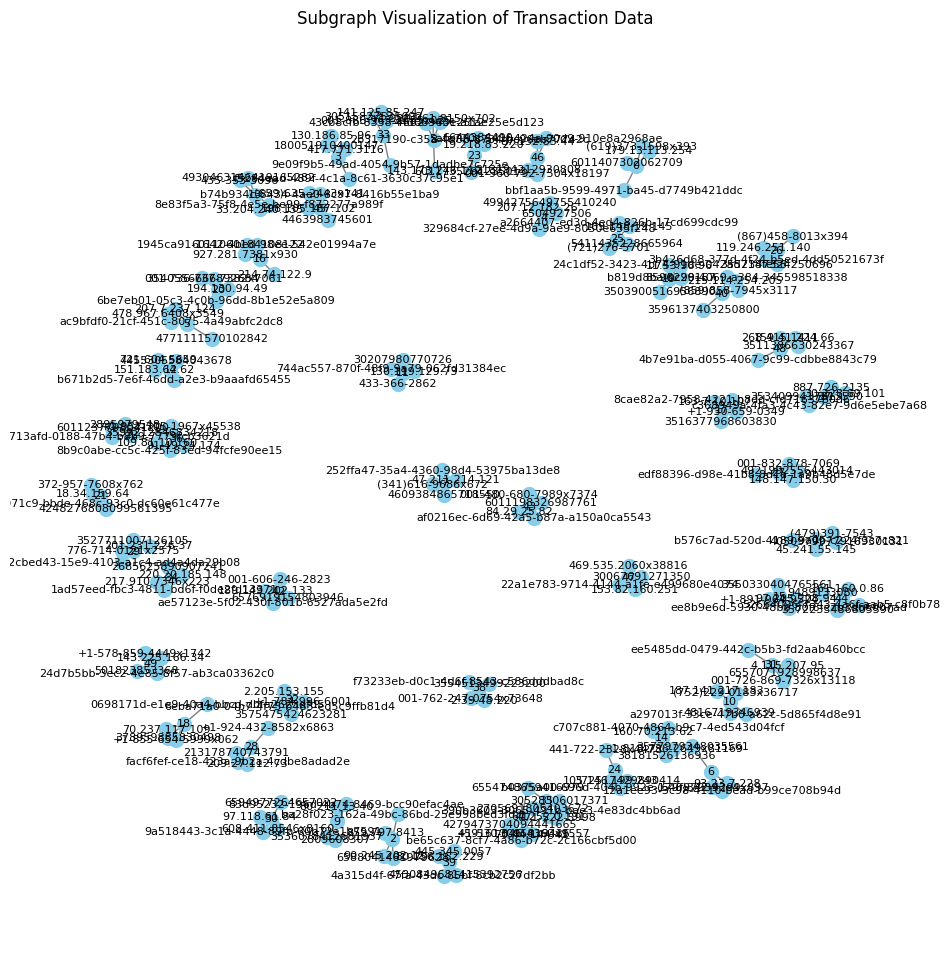

In [15]:
import matplotlib.pyplot as plt

# 전체 그래프가 너무 복잡할 수 있으므로, 일부 노드만 시각화하는 예시입니다.
# 예를 들어, 사용자 노드와 이들과 직접 연결된 노드만 포함한 서브그래프를 생성할 수 있습니다.
user_nodes = [n for n, attr in G.nodes(data=True) if attr.get('node_type') == 'user_id']
# 사용자 노드의 상위 50개와 그 이웃 노드들을 선택
selected_nodes = set(user_nodes[:50])
for node in list(selected_nodes):
    selected_nodes.update(list(G.neighbors(node)))

subgraph = G.subgraph(selected_nodes)

# 시각화: spring layout 사용
pos = nx.spring_layout(subgraph, seed=42)

plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(subgraph, pos, node_size=100, node_color='skyblue')
nx.draw_networkx_edges(subgraph, pos, alpha=0.5)
nx.draw_networkx_labels(subgraph, pos, font_size=8)
plt.title("Subgraph Visualization of Transaction Data")
plt.axis('off')
plt.show()

# 코드 간단 설명

1. **커뮤니티 분할 (Community Detection)**
   - `partition = community_louvain.best_partition(G)`
     - Louvain 알고리즘을 사용해 그래프 G의 각 노드를 커뮤니티별로 분할합니다.
     - 반환된 `partition` 딕셔너리는 각 노드와 해당 커뮤니티 ID의 매핑입니다.

2. **노드에 커뮤니티 정보 추가**
   - 반복문을 통해 각 노드의 커뮤니티 ID를 노드 속성으로 저장합니다.
   - ```python
     for node, comm_id in partition.items():
         G.nodes[node]['community'] = comm_id
     ```
     - 이후 그래프 내 노드들은 'community'라는 속성을 가지게 됩니다.

3. **커뮤니티별 노드 그룹화**
   - `itertools.groupby`를 사용해 커뮤니티별로 노드들을 그룹화합니다.
   - ```python
     from itertools import groupby
     
     all_communities = [list(group) for key, group in groupby(
         sorted(partition, key=partition.get), key=partition.get)]
     ```
     - `sorted(partition, key=partition.get)`로 노드를 커뮤니티 ID 기준으로 정렬한 뒤,
     - `groupby`로 동일한 커뮤니티 ID를 가진 노드들을 그룹으로 묶어 `all_communities` 리스트에 저장합니다.

In [11]:
from concurrent.futures import ThreadPoolExecutor, as_completed

In [12]:
def analyze_community(G, nodes):
    subgraph = G.subgraph(nodes)
    comm_density = nx.density(subgraph)
    modularity_score = community_louvain.modularity(partition, G)
    user_count = sum(1 for node in nodes if G.nodes[node]['node_type'] == 'user_id')
    phone_count = sum(1 for node in nodes if G.nodes[node]['node_type'] == 'phone_number')
    card_count = sum(1 for node in nodes if G.nodes[node]['node_type'] == 'credit_card')
    return [comm_density, modularity_score, len(nodes), user_count, phone_count, card_count]

def analyze_communities_parallel(G, all_communities):
    community_info = []
    with ThreadPoolExecutor() as executor:
        futures = {executor.submit(analyze_community, G, nodes): comm_id for comm_id, nodes in enumerate(all_communities)}
        for future in as_completed(futures):
            comm_id = futures[future]
            result = future.result()
            community_info.append([comm_id] + result)
    return pd.DataFrame(community_info, columns=['Community ID', 'Density', 'Modularity', 'Size', 'User Count', 'Phone Count', 'Card Count'])

df_community = analyze_communities_parallel(G, all_communities)


## analyze_community 함수
- **입력:**  
  - `G`: 전체 그래프  
  - `nodes`: 특정 커뮤니티에 속하는 노드들의 리스트
- **처리 과정:**  
  - **서브그래프 생성:**  
    - `subgraph = G.subgraph(nodes)`를 통해 주어진 노드들로 서브그래프를 만듭니다.
  - **밀도 계산:**  
    - `nx.density(subgraph)`를 사용해 서브그래프의 밀도(연결 정도)를 계산합니다.
  - **모듈러리티 계산:**  
    - `community_louvain.modularity(partition, G)`를 통해 전체 그래프에 대한 모듈러리티 점수를 구합니다.  
    - (여기서 `partition`은 글로벌 변수로, 각 노드의 커뮤니티 할당 정보를 담고 있습니다.)
  - **노드 타입 별 집계:**  
    - `user_count`: 해당 커뮤니티에서 `'user_id'` 타입의 노드 수  
    - `phone_count`: `'phone_number'` 타입의 노드 수  
    - `card_count`: `'credit_card'` 타입의 노드 수  
  - **커뮤니티 크기:**  
    - 전체 노드 수(`len(nodes)`)를 측정합니다.
- 출력: 커뮤니티의 밀도, 모듈러리티 점수, 전체 노드 수, 사용자, 전화번호, 신용카드 노드의 개수를 리스트로 반환.

## analyze_communities_parallel 함수
- 목적: 커뮤니티 분석을 병렬로 실행하여 전체 처리 속도 향상
- **병렬 처리:**  
  - `ThreadPoolExecutor`를 사용해 각 커뮤니티에 대해 `analyze_community` 함수를 병렬로 실행합니다.
  - 각 커뮤니티의 분석 결과에 해당 커뮤니티 ID를 함께 저장합니다.
- 출력: DataFrame 형식으로 커뮤니티 ID, 밀도, 모듈러리티, 전체 크기, 사용자 수, 전화번호 수, 신용카드 수를 담은 결과를 반환합니다.


In [13]:
df_community

,Community ID,Density,Modularity,Size,User Count,Phone Count,Card Count
0,0,0.4,0.99901,5,1,1,1
1,1,0.4,0.99901,5,1,1,1
2,3,0.4,0.99901,5,1,1,1
3,2,0.4,0.99901,5,1,1,1
4,5,0.4,0.99901,5,1,1,1
...,...,...,...,...,...,...,...
2908,2908,0.4,0.99901,5,1,1,1
2909,2910,0.4,0.99901,5,1,1,1
2910,2912,0.4,0.99901,5,1,1,1
2911,2909,0.4,0.99901,5,1,1,1


In [16]:
# import matplotlib.pyplot as plt

# # Color map based on community ID
# color_map = [data['community'] for node, data in G.nodes(data=True)]

# plt.figure(figsize=(12, 8))
# nx.draw(G, node_color=color_map, with_labels=False, node_size=40, edge_color='gray')
# plt.title("Network of Transactions with Community Coloring")
# plt.show()


/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


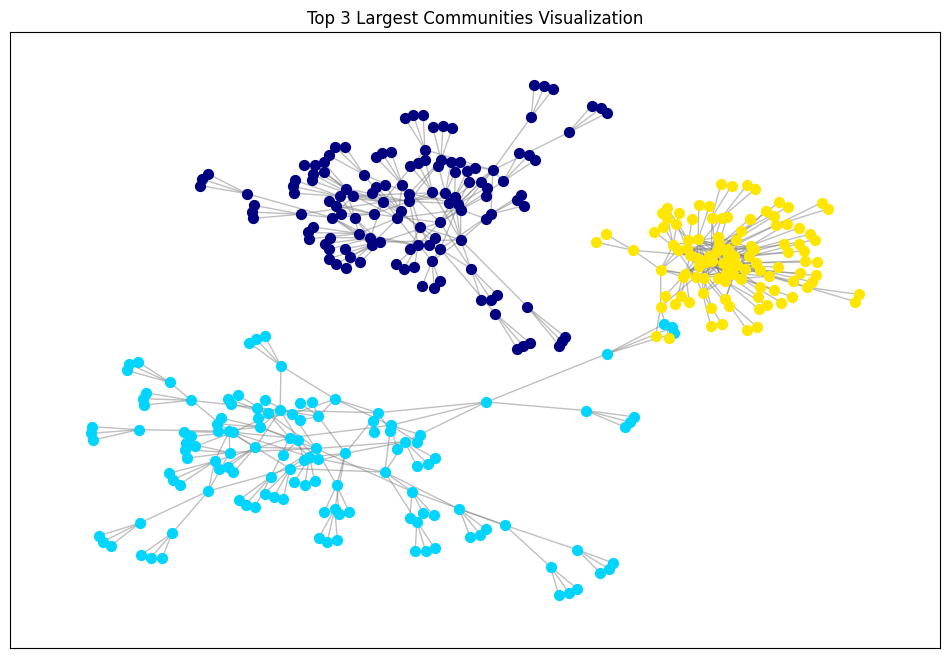

In [17]:

# 가장 큰 세 개의 커뮤니티 선택
top_communities = sorted(all_communities, key=len, reverse=True)[:3]
filtered_nodes = [node for comm in top_communities for node in comm]
G_top = G.subgraph(filtered_nodes)

# 시각화
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_top)  # 노드 위치 계산

# 각 커뮤니티별로 다른 색상으로 노드를 시각화
for commid, nodes in enumerate(top_communities):
    nx.draw_networkx_nodes(
        G_top, pos, nodelist=nodes, node_size=50,
        node_color=plt.cm.jet(commid / len(top_communities))
    )

nx.draw_networkx_edges(G_top, pos, alpha=0.5, edge_color='gray')
plt.title("Top 3 Largest Communities Visualization")
plt.show()


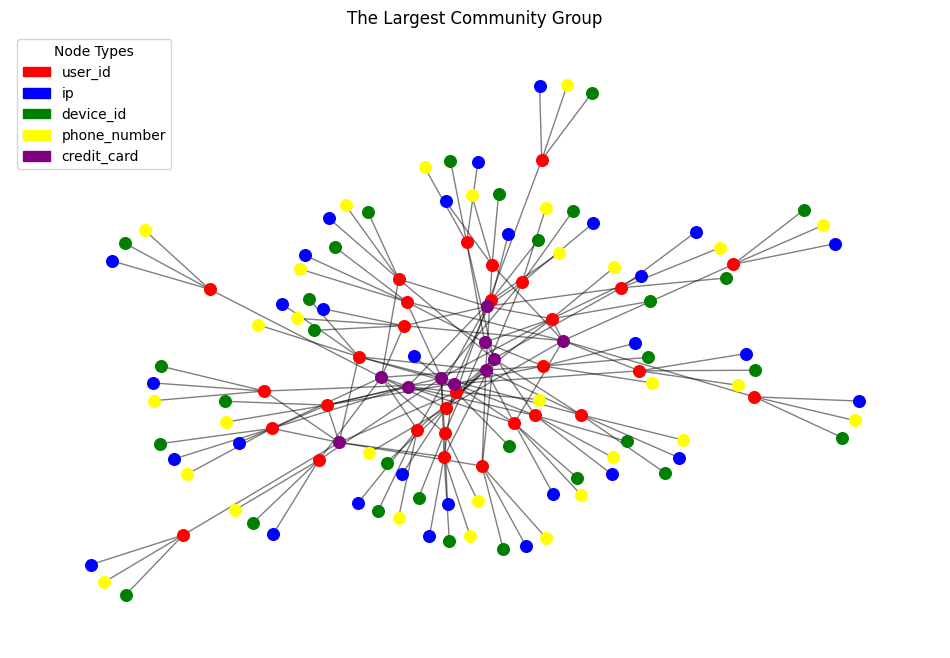

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as mpatches

# 가장 큰 커뮤니티 추출
largest_community = max(all_communities, key=len)
G_largest = G.subgraph(largest_community)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_largest)

# 노드 유형별로 색상 지정
node_types = {
    'user_id': 'red',
    'ip': 'blue',
    'device_id': 'green',
    'phone_number': 'yellow',
    'credit_card': 'purple'
}

# 노드 그리기: 각 유형별로 노드 색상 지정
for node_type, color in node_types.items():
    nodes_of_type = [n for n in G_largest if G_largest.nodes[n]['node_type'] == node_type]
    nx.draw_networkx_nodes(G_largest, pos,
                           nodelist=nodes_of_type,
                           node_color=color,
                           node_size=70,
                           label=node_type)

# 간선 그리기
nx.draw_networkx_edges(G_largest, pos, alpha=0.5)

# 범례 추가
patches = [mpatches.Patch(color=color, label=node_type) for node_type, color in node_types.items()]
plt.legend(handles=patches, title="Node Types", loc='upper left')

plt.title("The Largest Community Group")
plt.axis('off')  # 좌표 축 제거
plt.show()

- 이 그래프는 거래 데이터 네트워크에서 가장 큰 커뮤니티(연결 그룹)를 시각화한 결과입니다.

- **구성 요소:**  
  - **노드:**  
    각 노드는 데이터의 한 요소를 나타냅니다. (예: 사용자 ID, IP, 디바이스 ID, 전화번호, 신용카드 번호)  
    각 노드의 색상은 해당 속성(유형)을 구분합니다.
  - **간선:**  
    노드들 간의 연결을 나타내며, 이는 거래 데이터에서 두 항목 간의 관계를 의미합니다.

- **의미:**  
  - **커뮤니티 구조:**  
    가장 큰 커뮤니티는 많은 노드들이 밀접하게 연결된 그룹으로, 내부의 노드들은 서로 강한 관계를 가지고 있음을 시사합니다.
  - **노드 유형 분포:**  
    색상별 범례를 통해 각 데이터 속성이 네트워크 내에서 어떻게 분포되어 있는지 파악할 수 있습니다.
  - **분석 활용:**  
    이 시각화는 잠재적 사기 패턴이나 이상 거래를 식별하고, 데이터 간의 상호작용 및 구조를 이해하는 데 유용합니다.